In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 47kB/s 


In [2]:
! pip install keras

In [3]:
! pip install pandas

In [4]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [6]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
file="/content/drive/My Drive/Colab Notebooks/indian_liver_patient.csv"

In [24]:
import pandas as pd
df=pd.read_csv(file)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [25]:
df.shape

(583, 11)

In [26]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [27]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [28]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [29]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

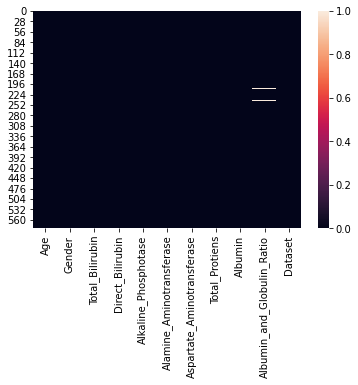

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [35]:
df['Dataset'].value_counts()

1    414
2    165
Name: Dataset, dtype: int64

In [38]:
df['Dataset']=df['Dataset'].replace({2:0})

In [39]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [41]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [42]:
X = df.drop('Dataset',axis='columns')
y = df['Dataset']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [43]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [44]:

X_train.shape

(405, 10)

In [45]:
X_test.shape

(174, 10)

In [46]:
X_train

array([[ 4.29556611e-01,  5.68796459e-01, -1.03963325e-01, ...,
        -4.22216649e-01, -1.76405309e+00, -1.78801700e+00],
       [ 1.84345054e+00,  5.68796459e-01, -6.79913926e-02, ...,
        -3.12645086e+00, -2.00981900e+00,  1.98713233e-01],
       [-7.58933942e-04, -1.75809815e+00, -4.63682646e-01, ...,
        -6.92640070e-01, -7.80989450e-01, -7.78367212e-01],
       ...,
       [-3.08127180e-01,  5.68796459e-01,  4.95009313e+00, ...,
         1.29046501e+00, -5.35223539e-01, -1.42975417e+00],
       [ 9.21345805e-01,  5.68796459e-01, -2.65837019e-01, ...,
        -2.31518059e+00, -1.76405309e+00, -7.78367212e-01],
       [-3.08127180e-01,  5.68796459e-01,  2.01838067e+00, ...,
        -6.92640070e-01, -1.27252127e+00, -1.42975417e+00]])

In [47]:
y_train.shape

(405,)

In [57]:
model = Sequential([
    Dense(8, input_shape=(10,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='Adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
13/13 [==============================] - 0s 12ms/step - loss: 0.6886 - accuracy: 0.5506 - val_loss: 0.6602 - val_accuracy: 0.6149
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5506 - val_loss: 0.6602 - val_accuracy: 0.6149
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5506 - val_loss: 0.6602 - val_accuracy: 0.6149
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5531 - val_loss: 0.6602 - val_accuracy: 0.6149
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5531 - val_loss: 0.6601 - val_accuracy: 0.6149
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5531 - val_loss: 0.6601 - val_accuracy: 0.6149
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5531 - val_loss: 0.6601 - val_accuracy: 0.6149
Epoch 8/500


In [60]:
r.history['loss']


[0.6886234283447266,
 0.6886094212532043,
 0.6885955333709717,
 0.6885818839073181,
 0.6885680556297302,
 0.6885546445846558,
 0.6885409951210022,
 0.6885277032852173,
 0.6885139346122742,
 0.6885005235671997,
 0.6884869337081909,
 0.6884734034538269,
 0.6884599924087524,
 0.688447117805481,
 0.6884335875511169,
 0.6884204149246216,
 0.6884073615074158,
 0.6883942484855652,
 0.6883813142776489,
 0.6883687973022461,
 0.688355565071106,
 0.6883428692817688,
 0.6883301734924316,
 0.6883172392845154,
 0.6883044838905334,
 0.6882916688919067,
 0.6882790923118591,
 0.6882660984992981,
 0.6882534623146057,
 0.6882407665252686,
 0.6882279515266418,
 0.6882153153419495,
 0.6882026791572571,
 0.688190221786499,
 0.6881776452064514,
 0.6881647706031799,
 0.6881520748138428,
 0.688139796257019,
 0.6881272196769714,
 0.6881142854690552,
 0.6881017684936523,
 0.6880892515182495,
 0.6880766749382019,
 0.6880640983581543,
 0.6880518198013306,
 0.6880390644073486,
 0.6880267262458801,
 0.68801420927047

In [61]:
model1 = Sequential([
    Dense(8, input_shape=(10,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.summary()
model1.compile(optimizer='Adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r1=model1.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 1.0219 - accuracy: 0.3309 - val_loss: 1.0537 - val_accuracy: 0.2931
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 1.0091 - accuracy: 0.3383 - val_loss: 1.0430 - val_accuracy: 0.2931
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.9998 - accuracy: 0.3457 - va

In [62]:
r1.history['loss']

[1.0219088792800903,
 1.0090638399124146,
 0.9998471736907959,
 0.9919780492782593,
 0.9852553606033325,
 0.9791911840438843,
 0.9737368226051331,
 0.9687354564666748,
 0.9640779495239258,
 0.9597268104553223,
 0.955597460269928,
 0.9517224431037903,
 0.9479592442512512,
 0.9444898962974548,
 0.9411635398864746,
 0.9378938674926758,
 0.9347620606422424,
 0.9317145943641663,
 0.9287408590316772,
 0.9258702397346497,
 0.923150360584259,
 0.9205153584480286,
 0.917919933795929,
 0.9153596758842468,
 0.9129055738449097,
 0.9104911088943481,
 0.908149003982544,
 0.9058539271354675,
 0.9036480188369751,
 0.9014266133308411,
 0.8993245959281921,
 0.8972846269607544,
 0.895247220993042,
 0.8932920098304749,
 0.8913725018501282,
 0.8894838690757751,
 0.8876040577888489,
 0.8857340216636658,
 0.8839150667190552,
 0.8821452856063843,
 0.8803808093070984,
 0.8786327838897705,
 0.8769205212593079,
 0.8751928210258484,
 0.8735251426696777,
 0.8719165921211243,
 0.870333731174469,
 0.8687469959259033

In [63]:
model2 = Sequential([
    Dense(8, input_shape=(10,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.summary()
model2.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r2=model2.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 0.7006 - accuracy: 0.5284 - val_loss: 0.6780 - val_accuracy: 0.5632
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6049 - val_loss: 0.6591 - val_accuracy: 0.6092
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.6198 - va

In [64]:
r2.history['loss']

[0.7006009221076965,
 0.680129885673523,
 0.6638040542602539,
 0.6500915288925171,
 0.637951135635376,
 0.6262570023536682,
 0.6151567101478577,
 0.6045784950256348,
 0.5943148136138916,
 0.5849649906158447,
 0.576422929763794,
 0.5687977075576782,
 0.5611630082130432,
 0.5544055700302124,
 0.5482984185218811,
 0.5428214073181152,
 0.537647008895874,
 0.5331476330757141,
 0.5295146703720093,
 0.525907576084137,
 0.5234111547470093,
 0.5203256607055664,
 0.5180269479751587,
 0.5158696174621582,
 0.513710618019104,
 0.5122330188751221,
 0.5104495882987976,
 0.509089469909668,
 0.5078045725822449,
 0.5068491697311401,
 0.5055793523788452,
 0.5045527219772339,
 0.5035415291786194,
 0.5024545788764954,
 0.5014068484306335,
 0.5006566643714905,
 0.49995312094688416,
 0.4991392195224762,
 0.49846187233924866,
 0.4977789521217346,
 0.4970758259296417,
 0.49629056453704834,
 0.4957831799983978,
 0.49483686685562134,
 0.4940362870693207,
 0.4936746060848236,
 0.492922306060791,
 0.49232491850852

In [66]:
model3 = Sequential([
    Dense(8, input_shape=(10,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.summary()
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r3=model3.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
13/13 [==============================] - 0s 12ms/step - loss: 0.7456 - accuracy: 0.4444 - val_loss: 0.7156 - val_accuracy: 0.4885
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.7179 - accuracy: 0.4889 - val_loss: 0.6911 - val_accuracy: 0.5517
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5728 - va

In [67]:
r3.history['loss']

[0.7456019520759583,
 0.7179459929466248,
 0.6914374232292175,
 0.6705913543701172,
 0.6529135704040527,
 0.63713139295578,
 0.6246569156646729,
 0.6141778826713562,
 0.6043241024017334,
 0.5951331853866577,
 0.5868616104125977,
 0.5795316696166992,
 0.5728639364242554,
 0.5673025846481323,
 0.5624678730964661,
 0.5583130121231079,
 0.554490864276886,
 0.5510721206665039,
 0.5474843978881836,
 0.544434130191803,
 0.5411956310272217,
 0.5383793711662292,
 0.536088764667511,
 0.5337479710578918,
 0.5313336849212646,
 0.529327929019928,
 0.5275447964668274,
 0.5255805253982544,
 0.5239339470863342,
 0.5222292542457581,
 0.5208341479301453,
 0.5190392136573792,
 0.5176166892051697,
 0.5162274241447449,
 0.5147665739059448,
 0.5135622620582581,
 0.5125440359115601,
 0.5110586881637573,
 0.5101397037506104,
 0.5088183283805847,
 0.5078573226928711,
 0.506995677947998,
 0.5061522722244263,
 0.5053293704986572,
 0.5043357610702515,
 0.5035068988800049,
 0.5027568936347961,
 0.5018288493156433,

In [68]:
model4 = Sequential([
    Dense(8, input_shape=(10,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model4.summary()
model4.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r4=model4.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
13/13 [==============================] - 0s 13ms/step - loss: 0.9297 - accuracy: 0.3358 - val_loss: 0.9089 - val_accuracy: 0.3276
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.8147 - accuracy: 0.3802 - val_loss: 0.8171 - val_accuracy: 0.3736
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.7418 - accuracy: 0.4568 - va

In [70]:
r4.history['loss']

[0.9296666383743286,
 0.8147178888320923,
 0.7418076992034912,
 0.6933284997940063,
 0.6601186990737915,
 0.6362630724906921,
 0.6186575889587402,
 0.6053895950317383,
 0.595370352268219,
 0.587706983089447,
 0.581221878528595,
 0.5757888555526733,
 0.5713804364204407,
 0.5678577423095703,
 0.5649436116218567,
 0.5622843503952026,
 0.5603090524673462,
 0.5585131049156189,
 0.557013750076294,
 0.5556607246398926,
 0.5544983148574829,
 0.5534711480140686,
 0.5523397326469421,
 0.551551103591919,
 0.55058753490448,
 0.5498431921005249,
 0.5489808917045593,
 0.5483192801475525,
 0.5477028489112854,
 0.5469892621040344,
 0.5464160442352295,
 0.5458080768585205,
 0.5452483892440796,
 0.5445365309715271,
 0.5439522862434387,
 0.5434050559997559,
 0.5428576469421387,
 0.5422585010528564,
 0.5417096018791199,
 0.5412766337394714,
 0.5407065153121948,
 0.5402344465255737,
 0.5398337244987488,
 0.5392670035362244,
 0.5388115644454956,
 0.5382701754570007,
 0.5377756357192993,
 0.5373165607452393,

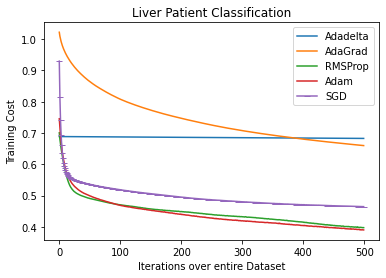

In [86]:
plt.plot(r.history['loss'],label='Adadelta')
plt.plot(r1.history['loss'], label='AdaGrad')
plt.plot(r2.history['loss'], label='RMSProp')
plt.plot(r3.history['loss'], label='Adam')
plt.plot(r4.history['loss'], label='SGD',marker='_')
plt.xlabel('Iterations over entire Dataset')
plt.ylabel('Training Cost')
plt.title('Liver Patient Classification')
plt.legend()